<a href="https://www.peqnp.com"><img border="0" alt="PEQNP" src="https://raw.githubusercontent.com/maxtuno/PEQNP/master/logo.png" width="640" height="400">

# PEQNP [![Downloads](https://pepy.tech/badge/peqnp)](https://pepy.tech/project/peqnp)
## Mathematical Solver

The PEQNP System its an automatic CNF and MIP encoder multi SAT and MIP Solver for General Constrained Diophantine Equations and NP-Complete Problems, full integrated with Python and zero dependencies.

For more info visit [www.peqnp.com](http://www.peqnp.com) for consulting, personalized support, sponsoring, etc...  oscar.riveros@peqnp.science

#### Thanks to JetBrains for support this project!

<a href="https://www.jetbrains.com/?from=PEQNP"><img border="0" alt="JetBrains support this project" src="https://raw.githubusercontent.com/maxtuno/PEQNP/master/jetbrains.png" width="100" height="100">

# Installation
```python
pip install PEQNP # -install-option=no-solver to use with CNF or SDK submodule
```

In [2]:
!pip install PEQNP

# Introducion
On PEQNP all elements are integers and relations on this integers, this relations are at bit level or arithmetic level. All integers live on $\mathbb{N}_{2 ^ {bits} - 1}$ and always positives, i.e. for two integer $(x, y)$ the operation, $(x - y)$ take all possibilities such that $x - y >= 0$.

# Supported Operations
$+$, $-$, $*$, $/$, $**$, $powmod$, $\%$, $\&$, $|$, $^$, $==$, $=$, $<$, $<=$, $>$, $>=$

# The Mantra
First is needed import all PEQNP system.

```python
import peqnp as pn
```
Define the data and constants.
```python
bits = 10
```
Next initialize the engine.
```python
pn.engine(bits=10)
```
Declare variables.
```python
x = pn.integer()
```
Add constrains.
```python
assert x < 10
```
Solve the problem.
```python
while pn.satisfy():
    print(x)
```

# Integer factorization
In number theory, integer factorization is the decomposition of a composite number into a product of smaller integers. If these factors are further restricted to prime numbers, the process is called prime factorization.

In [3]:
import peqnp as pn

rsa = 3007

pn.engine(rsa.bit_length())

p = pn.integer()
q = pn.integer()

assert p * q == rsa

while pn.satisfy():
    print(p, q)

97 31
3007 1
31 97
1 3007


# Multiset reconstruction by differences

Given a sorted multiset, their differences and one tip (an element and position for only one arbitrary element), is possible recovery the original multiset?

In [4]:
import time
import random
import peqnp as pn


def generator(n, max_val):
    return sorted([random.randint(1, max_val) for _ in range(n)])


def differences(lst):
    return [abs(lst[i] - lst[i - 1]) for i in range(1, len(lst))]


# 100 tests
for n in range(1, 10):

    m = random.randint(1, n ** 2)

    original = generator(n, m)
    diffs = differences(original)

    print('N, M         : {}, {}'.format(n, m))
    print('DIFFERENCES  : {}'.format(diffs))
    print('ORIGINAL     : {}'.format(original))

    # only one tip
    ith = random.choice(range(n))
    tip = original[ith]

    # init timer
    ini = time.time()

    # Empirical bits necessarily to solve the problem.
    pn.engine(sum(diffs).bit_length() + 4)

    # Declare a n-vector of integer variables to store the solution.
    x = pn.vector(size=n)

    # The tip is on x at index ith
    assert tip == pn.index(ith, x)

    # The i-th element of the instance is the absolute difference of two consecutive elements
    for i in range(n - 1):
        assert x[i] <= x[i + 1]
        assert pn.index(i, diffs) == x[i + 1] - x[i]

    # Solve the problem for only one solution
    # Turbo parameter is a destructive simplification
    # Solve with all power os SLIME SAT Solver but only for the fist solution.
    if pn.satisfy(turbo=True):
        o = [abs(x[i + 1] - x[i]) for i in range(n - 1)]
        c = 100 * len(set(map(int, x)).intersection(set(original))) / len(set(original))
        print('SOLVED       : {}'.format(x))
        print('COINCIDENCES : {}%'.format(c))
        if o == diffs:
            print('OK! - {}s'.format(time.time() - ini))
        else:
            print('NOK! - {}s'.format(time.time() - ini))
            raise Exception('ERROR!')
        if c != 100:
            raise Exception('Hypothesis Fail - 100%')

N, M         : 1, 1
DIFFERENCES  : []
ORIGINAL     : [1]
SOLVED       : [1]
COINCIDENCES : 100.0%
OK! - 0.0016434192657470703s
N, M         : 2, 3
DIFFERENCES  : [1]
ORIGINAL     : [1, 2]
SOLVED       : [1, 2]
COINCIDENCES : 100.0%
OK! - 0.002665281295776367s
N, M         : 3, 8
DIFFERENCES  : [2, 3]
ORIGINAL     : [1, 3, 6]
SOLVED       : [1, 3, 6]
COINCIDENCES : 100.0%
OK! - 0.007025718688964844s
N, M         : 4, 4
DIFFERENCES  : [0, 2, 1]
ORIGINAL     : [1, 1, 3, 4]
SOLVED       : [1, 1, 3, 4]
COINCIDENCES : 100.0%
OK! - 0.010522603988647461s
N, M         : 5, 15
DIFFERENCES  : [2, 2, 0, 0]
ORIGINAL     : [5, 7, 9, 9, 9]
SOLVED       : [5, 7, 9, 9, 9]
COINCIDENCES : 100.0%
OK! - 0.018276691436767578s
N, M         : 6, 21
DIFFERENCES  : [6, 0, 2, 0, 10]
ORIGINAL     : [2, 8, 8, 10, 10, 20]
SOLVED       : [2, 8, 8, 10, 10, 20]
COINCIDENCES : 100.0%
OK! - 0.0334630012512207s
N, M         : 7, 38
DIFFERENCES  : [4, 0, 5, 1, 4, 1]
ORIGINAL     : [2, 6, 6, 11, 12, 16, 17]
SOLVED       : 

# MIP

A submodule dedicated to Mixed Integer Programming.

https://en.wikipedia.org/wiki/Integer_programming

In [5]:
import peqnp as pn

pn.engine()

x0 = pn.linear(is_real=True)
x1 = pn.linear(is_real=True)
x2 = pn.linear(is_real=True)
x3 = pn.linear(is_real=True)
x4 = pn.linear(is_real=True)
x5 = pn.linear()
x6 = pn.linear()
x7 = pn.linear()
x8 = pn.linear()
x9 = pn.linear()
assert +6.4160 * x0 + 20.3590 * x1 + 1.5981 * x2 - 1.2071 * x3 - 4.6026 * x4 - 5.7098 * x5 - 4.1160 * x6 + 1.2467 * x7 - 14.2028 * x8 + 6.0885 * x9 <= 51.0000
assert -0.1930 * x0 + 1.1859 * x1 + 2.9537 * x2 - 2.3777 * x3 + 1.4154 * x4 + 9.2526 * x5 - 3.6259 * x6 + 3.4193 * x7 - 21.4218 * x8 - 0.7692 * x9 <= 41.0000
assert -27.1712 * x0 - 21.2901 * x1 + 32.6104 * x2 + 1.4699 * x3 + 8.1651 * x4 - 12.8153 * x5 + 2.4100 * x6 - 57.0053 * x7 - 7.2989 * x8 + 7.0098 * x9 <= 79.0000
assert -2.3318 * x0 + 0.8284 * x1 + 6.2896 * x2 + 0.6104 * x3 - 31.1931 * x4 + 4.1556 * x5 + 2.6317 * x6 - 48.5799 * x7 - 1.1840 * x8 + 28.7408 * x9 <= 93.0000
assert +12.0876 * x0 + 1.2307 * x1 - 0.9757 * x2 - 4.2857 * x3 + 4.8579 * x4 + 19.5823 * x5 + 18.5408 * x6 - 3.0287 * x7 + 2.0617 * x8 - 3.5956 * x9 <= 25.0000
assert -50.3777 * x0 + 6.9980 * x1 - 67.9637 * x2 - 2.0244 * x3 + 7.8885 * x4 - 2.5394 * x5 - 5.3325 * x6 + 0.3273 * x7 - 249.6093 * x8 + 3.7692 * x9 <= 41.0000
assert +43.2031 * x0 - 2.0964 * x1 + 10.1320 * x2 - 13.9120 * x3 + 3.2838 * x4 + 10.6522 * x5 + 6.2647 * x6 + 2.8932 * x7 - 6.3529 * x8 + 20.0324 * x9 <= 78.0000
assert -2.0752 * x0 - 7.4701 * x1 - 0.2348 * x2 - 2.0003 * x3 - 0.6376 * x4 + 1.7804 * x5 + 119.5958 * x6 - 6.2943 * x7 + 3.3538 * x8 - 2.6467 * x9 <= 27.0000
assert +3.1615 * x0 + 6.0781 * x1 - 1.8893 * x2 - 3.2409 * x3 - 34.0146 * x4 + 23.8191 * x5 - 8.8890 * x6 - 6.8173 * x7 + 6.7114 * x8 - 8.1344 * x9 <= 21.0000
assert +0.0000 * x0 + 13.1440 * x1 + 7.5737 * x2 + 2.8277 * x3 - 4.3930 * x4 + 0.0000 * x5 - 22.1786 * x6 + 2.8980 * x7 - 9.0440 * x8 - 60.4170 * x9 <= 93.0000
assert x0 <= 92.0000
assert x1 <= 46.0000
assert x2 <= 74.0000
assert x3 <= 78.0000
assert x4 <= 41.0000
assert x5 <= 47.0000
assert x6 <= 33.0000
assert x7 <= 35.0000
assert x8 <= 23.0000
assert x9 <= 63.0000
print(pn.maximize(+0.0000 * x0 + 9.6856 * x1 + 0.0000 * x2 - 7.8267 * x3 - 3.4649 * x4 - 6.3391 * x5 - 3.6316 * x6 + 44.7655 * x7 + 3.7610 * x8 - 57.1083 * x9))
print(x0)
print(x1)
print(x2)
print(x3)
print(x4)
print(x5)
print(x6)
print(x7)
print(x8)
print(x9)

1810.5335855955589
0.0
16.609160567807837
0.0
0.0
0.0
0
1
35
23
0


# Diophantine Equations

https://en.wikipedia.org/wiki/Diophantine_equation

### Let be $x, y \in \mathbb{N} \vert x^3 - x + 1 = y^2$

In [6]:
import peqnp as pn

pn.engine(10)

x = pn.integer()
y = pn.integer()

assert x ** 3 - x + 1 == y ** 2

assert x != 0
assert y != 0

while pn.satisfy():
    print('{0} ** 3 - {0} + 1, {1} ** 2'.format(x, y))

5 ** 3 - 5 + 1, 11 ** 2
1 ** 3 - 1 + 1, 1 ** 2
3 ** 3 - 3 + 1, 5 ** 2


### Let be $x, y \in \mathbb{Q} \vert x^3 + xy = y^2$

In [7]:
import peqnp as pn

pn.engine(10)

x = pn.rational()
y = pn.rational()

assert x ** 3 + x * y == y ** 2

while pn.satisfy():
    print('{0} ** 3 + {0} * {1} == {1} ** 2'.format(x, y))

(0 / 1) ** 3 + (0 / 1) * (0 / 1) == (0 / 1) ** 2
(2 / 1) ** 3 + (2 / 1) * (4 / 1) == (4 / 1) ** 2
(6 / 1) ** 3 + (6 / 1) * (18 / 1) == (18 / 1) ** 2
(0 / 2) ** 3 + (0 / 2) * (0 / 16) == (0 / 16) ** 2


### Let be $x, y \in \mathbb{C} \vert x^3 + x + 1 = y^2$

In [8]:
import peqnp as pn

pn.engine(11)

x = pn.gaussian()
y = pn.gaussian()

assert x ** 3 + x + 1 == y ** 2

while pn.satisfy():
    print('{0} ** 3 + {0} + 1 == {1} ** 2'.format(complex(x), complex(y)))

(2+1j) ** 3 + (2+1j) + 1 == (3+2j) ** 2
0j ** 3 + 0j + 1 == (1+0j) ** 2


# Vectors

In [1]:
import peqnp as pn

pn.engine(10)

x = pn.vector(size=2, is_gaussian=True)
y = pn.gaussian()

assert sum(x) ** 3 == y ** 5
assert y != complex(0, 0)

while pn.satisfy():
    print('sum({0}) ** 3 == {1} ** 5'.format(x, y))

sum([(1+0j), (0+0j)]) ** 3 == (1+0j) ** 5
sum([(0+0j), (1+0j)]) ** 3 == (1+0j) ** 5


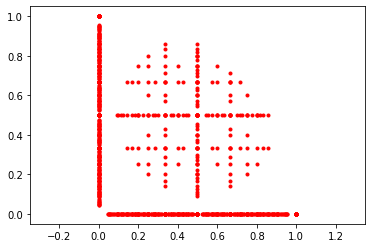

In [2]:
import numpy as np
import peqnp as pn
import matplotlib.pyplot as plt

dim = 2

pn.engine(9)

ps = pn.vector(size=dim, is_rational=True)

assert sum([p ** dim for p in ps]) <= 1

dots = []
while pn.satisfy():
    dots.append(np.vectorize(float)(ps))

x, y = zip(*dots)
plt.axis('equal')
plt.plot(x, y, 'r.')
plt.show()

# NP-Complete

NP - complete problem, any of a class of computational problems for which no efficient solution algorithm has been found. Many significant computer - science problems belong to this class—e.g., the traveling salesman problem, satisfiability problems, and graph - covering problems.

https://en.wikipedia.org/wiki/NP-completeness

# Satisfiability

Study of boolean functions generally is concerned with the set of truth assignments(assignments of 0 or 1 to each of the variables) that make the function true.

https://en.wikipedia.org/wiki/Boolean_satisfiability_problem

In [3]:
import functools
import operator

import peqnp as pn

n, m, cnf = 10, 24, [[9, -5, 10, -6, 3],
                     [6, 8],
                     [8, 4],
                     [-10, 5],
                     [-9, 8],
                     [-9, -3],
                     [-2, 5],
                     [6, 4],
                     [-2, -1],
                     [7, -2],
                     [-9, 4],
                     [-1, -10],
                     [-3, 4],
                     [7, 5],
                     [6, -3],
                     [-10, 7],
                     [-1, 7],
                     [8, -3],
                     [-2, -10],
                     [-1, 5],
                     [-7, 1, 9, -6, 3],
                     [-9, 6],
                     [-8, 10, -5, -4, 2],
                     [-4, -7, 1, -8, 2]]

pn.engine(bits=1)
x = pn.tensor(dimensions=(n,), key='x')
assert functools.reduce(operator.iand, (functools.reduce(operator.ior, (x[[abs(lit) - 1]](lit < 0, lit > 0) for lit in cls)) for cls in cnf)) == 1
if pn.satisfy(turbo=True):
    print('SAT')
    print(' '.join(map(str, [(i + 1) if b else -(i + 1) for i, b in enumerate(x.binary)])) + ' 0')
else:
    print('UNSAT')

SAT
-1 2 -3 4 5 -6 7 8 -9 -10 0


# k-Clique

Input: Graph $G$, positive integer $k$

Property: $G$ has a set of mutually adjacent nodes.

https://en.wikipedia.org/wiki/Clique_problem

In [4]:
import peqnp as pn

# Ths bits of the clique to search
k = 3

# Get the graph, and the dimension for the graph
n, matrix = 5, [(1, 0), (0, 2), (1, 4), (2, 1), (4, 2), (3, 2)]

# Ensure the problem can be represented
pn.engine(bits=k.bit_length())

# Declare an integer of n-bits
bits = pn.integer(bits=n)

# The bits integer have "bits"-active bits, i.e, the clique has "bits"-elements
assert sum(pn.switch(bits, i) for i in range(n)) == k

# This entangles all elements that are joined together
for i in range(n - 1):
    for j in range(i + 1, n):
        if (i, j) not in matrix and (j, i) not in matrix:
            assert pn.switch(bits, i) + pn.switch(bits, j) <= 1

if pn.satisfy(turbo=True):
    print(k)
    print(' '.join([str(i) for i in range(n) if not bits.binary[i]]))
else:
    print('Infeasible ...')

3
0 1 2


# Vertex Cover

In the mathematical discipline of graph theory, a vertex cover (sometimes node cover) of a graph is a set of vertices that includes at least one endpoint of every edge of the graph. The problem of finding a minimum vertex cover is a classical optimization problem in computer science and is a typical example of an NP-hard optimization problem that has an approximation algorithm. Its decision version, the vertex cover problem, was one of Karp's 21 NP-complete problems and is therefore a classical NP-complete problem in computational complexity theory. Furthermore, the vertex cover problem is fixed-parameter tractable and a central problem in parameterized complexity theory.

https://en.wikipedia.org/wiki/Vertex_cover

In [5]:
import peqnp as pn

# Get the graph and dimension, and the bits of the cover.
n, graph, vertex, k = 5, [(1, 0), (0, 2), (1, 4), (2, 1), (4, 2), (3, 2)], [0, 1, 2, 3, 4], 3

# Ensure the problem can be represented
pn.engine(bits=n.bit_length() + 1)

# An integer with n-bits to store the indexes for the cover
index = pn.integer(bits=n)

# This entangled the all possible covers
for i, j in graph:
    assert pn.switch(index, vertex.index(i), neg=True) + pn.switch(index, vertex.index(j), neg=True) >= 1

# Ensure the cover has bits k
assert sum(pn.switch(index, vertex.index(i), neg=True) for i in vertex) == k

if pn.satisfy(turbo=True):
    opt = sum(index.binary)
    print('p bits {}'.format(opt))
    print(' '.join([str(vertex[i]) for i in range(n) if index.binary[i]]))
else:
    print('Infeasible ...')

p bits 3
1 2 4


# Multidimensional Latin Squares

In combinatorics and in experimental design, a Latin square is an n × n array filled with n different symbols, each occurring exactly once in each row and exactly once in each column.

https://en.wikipedia.org/wiki/Latin_square

In [6]:
import numpy as np
import peqnp as pn

n = 6
m = 3

pn.engine(n.bit_length())

Y = pn.vector(size=n ** m)

pn.apply_single(Y, lambda k: k < n)

Y = np.reshape(Y, newshape=(m * [n]))

for i in range(n):
    pn.all_different(Y[i])
    pn.all_different(Y.T[i])
    for j in range(n):
        pn.all_different(Y[i][j])
        pn.all_different(Y.T[i][j])

for idx in pn.hyper_loop(m - 1, n):
    s = Y
    for i in idx:
        s = s[i]
        pn.all_different(s)
        pn.all_different(s.T)

if pn.satisfy(turbo=True):
    y = np.vectorize(int)(Y).reshape(m * [n])
    print(y)
else:
    print('Infeasible ...')

[[[0 3 1 2 5 4]
  [2 0 4 1 3 5]
  [4 5 0 3 2 1]
  [5 2 3 4 1 0]
  [1 4 2 5 0 3]
  [3 1 5 0 4 2]]

 [[3 2 5 4 0 1]
  [4 5 2 3 1 0]
  [2 0 4 1 3 5]
  [1 4 0 5 2 3]
  [5 1 3 0 4 2]
  [0 3 1 2 5 4]]

 [[2 1 3 0 4 5]
  [1 3 0 5 2 4]
  [5 4 1 2 0 3]
  [3 0 4 1 5 2]
  [0 2 5 4 3 1]
  [4 5 2 3 1 0]]

 [[4 5 0 3 1 2]
  [0 4 1 2 5 3]
  [1 3 2 5 4 0]
  [2 1 5 0 3 4]
  [3 0 4 1 2 5]
  [5 2 3 4 0 1]]

 [[1 0 4 5 2 3]
  [5 1 3 4 0 2]
  [3 2 5 0 1 4]
  [0 5 2 3 4 1]
  [4 3 1 2 5 0]
  [2 4 0 1 3 5]]

 [[5 4 2 1 3 0]
  [3 2 5 0 4 1]
  [0 1 3 4 5 2]
  [4 3 1 2 0 5]
  [2 5 0 3 1 4]
  [1 0 4 5 2 3]]]


# Travelling salesman problem with HESS Algorithm (O. Riveros)

https://independent.academia.edu/oarr

The travelling salesman problem asks the following question: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?" It is an NP-hard problem in combinatorial optimization, important in operations research and theoretical computer science.

https://en.wikipedia.org/wiki/Travelling_salesman_problem

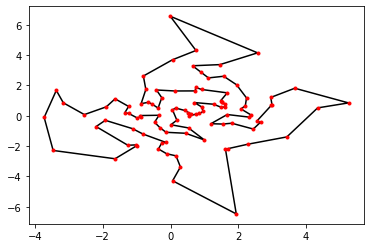

In [7]:
import peqnp as pn
import numpy as np

n = 100
data = np.random.logistic(size=(n, 2))
seq = pn.hess_sequence(n, oracle=lambda seq: sum(np.linalg.norm(data[seq[i - 1]] - data[seq[i]]) for i in range(n)), fast=False)
x, y = zip(*[data[i] for i in seq + [seq[0]]])
plt.plot(x, y, 'k-')
plt.plot(x, y, 'r.')
plt.show()

# Knapsack problem

The knapsack problem is a problem in combinatorial optimization: Given a set of items, each with a weight and a value, determine the number of each item to include in a collection so that the total weight is less than or equal to a given limit and the total value is as large as possible. It derives its name from the problem faced by someone who is constrained by a fixed-size knapsack and must fill it with the most valuable items.

https://en.wikipedia.org/wiki/Knapsack_problem

In [8]:
import peqnp as pn
import numpy as np

n = 10
values = np.random.logistic(size=n)
profit = np.random.logistic(size=n)
capacity = np.random.sample()
pn.engine()
selects = pn.vector(size=n, is_mip=True)
pn.apply_single(selects, lambda x: x <= 1)
assert np.dot(values, selects) <= capacity
opt = pn.maximize(np.dot(profit, selects))
slots = list(map(int, selects))
print('PROFIT  : {} vs {}'.format(np.dot(profit, slots), opt))
print('VALUES  : {} <= {}'.format(np.dot(values, slots), capacity))
print('SELECT  : {}'.format(slots))

PROFIT  : 5.847384800278561 vs 5.847384800278561
VALUES  : 0.7212410673899717 <= 0.8150111720192085
SELECT  : [0, 0, 1, 0, 1, 0, 1, 0, 0, 0]


# Magic square


In recreational mathematics and combinatorial design, a magic square is a $n\times n$ square grid (where n is the number of cells on each side) filled with distinct positive integers in the range 
${1,2,...,n^{2}}$ such that each cell contains a different integer and the sum of the integers in each row, column and diagonal is equal.

https://en.wikipedia.org/wiki/Magic_square

In [9]:
import peqnp as pn
import numpy as np

n = 3
pn.engine(5)
c = pn.integer()
xs = pn.matrix(dimensions=(n, n))
pn.apply_single(pn.flatten(xs), lambda x: x > 0)
pn.all_different(pn.flatten(xs))
for i in range(n):
    assert sum(xs[i][j] for j in range(n)) == c
for j in range(n):
    assert sum(xs[i][j] for i in range(n)) == c
assert sum(xs[i][i] for i in range(n)) == c
assert sum(xs[i][n - 1 - i] for i in range(n)) == c
if pn.satisfy(turbo=True):
    print(c)
    print(np.vectorize(int)(xs))
else:
    print('Infeasible ...')

18
[[ 2  9  7]
 [11  6  1]
 [ 5  3 10]]


# Schur Triples problem:

Input: list of 3N distinct positive integers

Question: Is there a partition of the list into N triples $(a_i, b_i, c_i)$ such that $a_i+b_i=c_i$

The condition that all numbers must be distinct makes the problem very interesting and McDiarmid calls it a surprisingly troublesome.

https://cstheory.stackexchange.com/questions/16253/list-of-strongly-np-hard-problems-with-numerical-data

In [10]:
import peqnp as pn
import numpy as np

bits = 7
size = 3 * 10
triplets = []
while len(triplets) < size:
    a = np.random.randint(1, 2 ** bits)
    b = np.random.randint(1, 2 ** bits)
    if a != b and a not in triplets and b not in triplets and a + b not in triplets:
        triplets += [a, b, a + b]
triplets.sort()
print(triplets)
pn.engine(bits=max(triplets).bit_length())
xs, ys = pn.permutations(triplets, size)
for i in range(0, size, 3):
    assert ys[i] + ys[i + 1] == ys[i + 2]
if pn.satisfy(turbo=True):
    for i in range(0, size, 3):
        print('{} == {} + {}'.format(ys[i + 2], ys[i], ys[i + 1]))
else:
    print('Infeasible ...')

[3, 9, 15, 21, 27, 36, 38, 40, 42, 44, 45, 50, 53, 56, 60, 69, 84, 91, 95, 98, 107, 114, 120, 127, 135, 141, 144, 157, 167, 170]
98 == 3 + 95
69 == 42 + 27
45 == 36 + 9
167 == 127 + 40
170 == 114 + 56
53 == 38 + 15
135 == 91 + 44
157 == 107 + 50
144 == 84 + 60
141 == 120 + 21


# Subset sum problem

In this problem, there is a given set with some integer elements. And another some value is also provided, we have to find a subset of the given set whose sum is the same as the given sum value.

https://en.wikipedia.org/wiki/Subset_sum_problem

In [11]:
import peqnp as pn
import numpy as np

universe = np.random.randint(1, 1000, size=32)
t = np.random.randint(min(universe), sum(universe))
print(t, universe)
pn.engine(t.bit_length())
bits, subset = pn.subsets(universe)
assert sum(subset) == t
if pn.satisfy(turbo=True):
    solution = [universe[i] for i in range(len(universe)) if bits.binary[i]]
    print(sum(solution), solution)
else:
    print('Infeasible ...')

4051 [808 844 423 442 988 464 253  14 911 361 526 928 865  21 221 580 888 895
 924 574 505 360   1 901 986 193 601 620 173  67 637  20]
4051 [808, 988, 464, 21, 221, 580, 1, 901, 67]


In [12]:
import peqnp as pn
import numpy as np

universe = np.random.randint(1, 1000, size=32)
t = np.random.randint(min(universe), sum(universe))
print(t, universe)
pn.engine(t.bit_length())
T = pn.tensor(dimensions=(len(universe)))
assert sum(T[[i]](0, universe[i]) for i in range(len(universe))) == t
if pn.satisfy(turbo=True):
    solution = [universe[i] for i in range(len(universe)) if T.binary[i]]
    print(sum(solution), solution)
else:
    print('Infeasible ...')

1241 [726 179 786 492 483 777 641 563 483 235 583 463 946 748 451 213 847 182
 583 578 147 941 729 577 978 542 370 521   7  45 584 869]
1241 [235, 370, 7, 45, 584]


# Permutation Reconstruction from Differences

https://arxiv.org/pdf/1410.6396.pdf

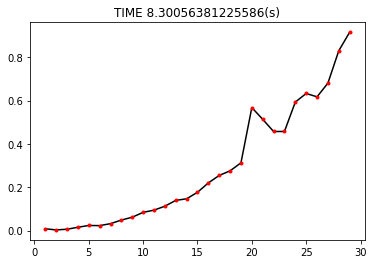

In [14]:
import peqnp as pn
import numpy as np

def gen_instance(n):
    import random
    y = list(range(1, n + 1))
    random.shuffle(y)
    return [abs(y[i + 1] - y[i]) for i in range(n - 1)]


import time
start = time.time()
times = []
sizes = []
for n in range(1, 30):
    diffs = gen_instance(n)
    ini = time.time()
    pn.engine(n.bit_length() + 1)
    x = pn.vector(size=n)
    pn.all_different(x)
    pn.apply_single(x, lambda a: 1 <= a <= n)
    for i in range(n - 1):
        assert pn.index(i, diffs) == pn.one_of([x[i + 1] - x[i], x[i] - x[i + 1]])
    if pn.satisfy(turbo=True):
        end = time.time() - ini
        xx = [abs(x[i + 1] - x[i]) for i in range(n - 1)]
        if xx == diffs:
            sizes.append(n)
            times.append(end)
        else:
            raise Exception('Error!')
    else:
        raise Exception('Error!')
end = time.time() - start
plt.title('TIME {}(s)'.format(end))
plt.plot(sizes, times, 'k-')
plt.plot(sizes, times, 'r.')
plt.show()
plt.close()

# Hamiltonian Cycle Problem

In the mathematical field of graph theory, a Hamiltonian path (or traceable path) is a path in an undirected or directed graph that visits each vertex exactly once. A Hamiltonian cycle (or Hamiltonian circuit) is a Hamiltonian path that is a cycle. Determining whether such paths and cycles exist in graphs is the Hamiltonian path problem, which is NP-complete.

https://en.wikipedia.org/wiki/Hamiltonian_path

In [15]:
import sys

import peqnp as pn
import numpy as np


n = 10
M = np.random.randint(0, 2, size=(n, n))
print(M)
pn.engine((n ** 2).bit_length())
ids, elements = pn.matrix_permutation((1 - M).flatten(), n)
assert sum(elements) == 0
if pn.satisfy(turbo=True):
    for i in ids:
        for j in ids:
            sys.stdout.write('{} '.format(M[i.value][j.value]))
        sys.stdout.write('\n') 
    sys.stdout.write('\n')
else:
    print('Infeasible ...')

[[1 1 1 0 1 1 1 0 1 1]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 1 0 1 0 1 1 1 1]
 [1 0 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 1]
 [1 0 0 0 1 1 1 0 0 0]
 [1 0 0 0 1 1 0 0 0 0]
 [1 0 1 0 0 1 1 0 0 1]
 [1 1 1 0 1 1 1 1 0 1]
 [0 0 1 0 0 1 0 1 1 1]]
Infeasible ...


# Bin packing problem

In the bin packing problem, items of different volumes must be packed into a finite number of bins or containers each of a fixed given volume in a way that minimizes the number of bins used. In computational complexity theory, it is a combinatorial NP-hard problem. The decision problem (deciding if items will fit into a specified number of bins) is NP-complete.

https://en.wikipedia.org/wiki/Bin_packing_problem

In [16]:
import peqnp as pn
import numpy as np

capacity = 50
size = 50
elements = sorted([np.random.randint(1, capacity // 2 - 1) for _ in range(size)], reverse=True)
print(capacity)
print(elements)
bins = int(np.ceil(sum(elements) / capacity))
while True:
    pn.engine(bits=capacity.bit_length() + 1)
    slots = pn.vector(bits=len(elements), size=bins)
    for i in range(len(elements)):
        assert sum(pn.switch(slot, i) for slot in slots) == 1
    for slot in slots:
        assert sum(pn.switch(slot, i) * elements[i] for i in range(len(elements))) <= capacity
    if pn.satisfy(turbo=True):
        print('Solution for {} bins...'.format(bins))
        for slot in slots:
            print(''.join(['_' if boolean else '#' for boolean in slot.binary]))
        for slot in slots:
            sub = [item for i, item in enumerate(elements) if not slot.binary[i]]
            print(sum(sub), sub)
        break
    else:
        print('No solution for {} bins...'.format(bins))
        bins += 1

50
[23, 23, 22, 22, 22, 21, 21, 21, 21, 20, 19, 18, 18, 17, 17, 17, 17, 16, 16, 16, 15, 15, 15, 15, 15, 14, 14, 14, 13, 12, 12, 12, 12, 11, 10, 10, 9, 9, 9, 8, 7, 6, 6, 5, 5, 4, 3, 2, 2, 2]
Solution for 14 bins...
___##_____________________________________________
______#_______________#_______#________________#__
_____________________#______#___#___________#_____
_________#______________#__________#_______#______
__#____________________#_____________#____________
____________#___#______________________#__#_______
##___________________________________________#____
________#______#_________________#________________
_____#________#_______________________________#___
_____________#_____________#______#___#___________
_______#__#_____________________________#________#
___________#_____#_______#______________________#_
__________________##___________#_________#________
____________________#_____#__#______#_____________
44 [22, 22]
50 [21, 15, 12, 2]
45 [15, 13, 12, 5]
50 [20, 15, 10, 5]
46 

# Zero-One Integer Programming Definition

Zero-one integer programming (which can also be written as 0-1 integer programming) is a mathematical method of using a series of binary, yes (1) and no (0) answers to arrive at a solution when there are two mutually exclusive options.

https://en.wikipedia.org/wiki/Integer_programming

In [17]:
import peqnp as pn
import numpy as np

n, m = 10, 5
cc = np.random.randint(0, 1000, size=(n, m))
d = np.dot(cc, np.random.randint(0, 2, size=(m,)))
print(cc)
print(d)
pn.engine(bits=int(np.sum(cc)).bit_length())
xs = pn.vector(size=m)
pn.all_binaries(xs)
assert (np.dot(cc, xs) == d).all()
if pn.satisfy():
    print(xs)
    print('Proof:')
    print(np.dot(cc, xs))
else:
    print('Infeasible...')

[[447 695 334 862 761]
 [434  55 291 456 661]
 [418 767 578 356 720]
 [313 797 263  78 656]
 [355 155 559 727 218]
 [417 192 715 136 907]
 [593 198 855 609 668]
 [533 966  40 552 186]
 [ 99 422 177 794 235]
 [  6 290  72 460 260]]
[1095  952 1298  919  777 1622 1523  226  412  332]
[0, 0, 1, 0, 1]
Proof:
[1095 952 1298 919 777 1622 1523 226 412 332]


# n-Queens Completion Problem

The n- Queens Completion problem is a variant, dating to 1850, in which some queens are already placed and the solver is asked to place the rest, if possi- ble. ... The n-Queens problem is to place n chess queens on an n by n chessboard so that no two queens are on the same row, column or diagonal.

https://www.ijcai.org/Proceedings/2018/0794.pdf

In [18]:
import peqnp as pn


def completion(n, m, seed):
    import random
    """
    http://www.csplib.org/Problems/prob079/data/queens-gen-fast.py.html
    """
    random.seed(seed)

    d1 = [0 for _ in range(2 * n - 1)]
    d2 = [0 for _ in range(2 * n - 1)]

    valid_rows = [i for i in range(n)]
    valid_cols = [j for j in range(n)]

    def no_attack(r, c):
        return d1[r + c] == 0 and d2[r - c + n - 1] == 0

    pc = []
    queens_left = n

    for attempt in range(n * n):
        i = random.randrange(queens_left)
        j = random.randrange(queens_left)
        r = valid_rows[i]
        c = valid_cols[j]
        if no_attack(r, c):
            pc.append([r, c])
            d1[r + c] = 1
            d2[r - c + n - 1] = 1
            valid_rows[i] = valid_rows[queens_left - 1]
            valid_cols[j] = valid_cols[queens_left - 1]
            queens_left -= 1
            if len(pc) == m:
                return [[x + 1, y + 1] for x, y in pc]

def show(pc):
    table = ''
    for i in range(1, n + 1):
        table += ''
        for j in range(1, n + 1):
            if [i, j] not in pc:
                table += '. '
            else:
                table += 'Q '
        table += '\n'
    print(table)
    print('# seed = {}'.format(seed))
    
n, m, seed = 30, 15, 0
placed_queens = completion(n, m, seed)
show(placed_queens)
pn.engine(bits=n.bit_length() + 1)
qs = pn.vector(size=n)
for (a, b) in placed_queens:
    assert qs[a - 1] == b - 1
pn.apply_single(qs, lambda x: x < n)
pn.apply_dual(qs, lambda x, y: x != y)
pn.apply_dual([qs[i] + i for i in range(n)], lambda x, y: x != y)
pn.apply_dual([qs[i] - i for i in range(n)], lambda x, y: x != y)
if pn.satisfy(turbo=True):
    for i in range(n):
        print(''.join(['Q ' if qs[i] == j else '. ' for j in range(n)]))
    print('')
else:
    print('Infeasible ...')

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . Q . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . Q . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . Q . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . Q . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . Q . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. Q . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . Q 
. . . . . . . . . . . . 

# Multidimensional knapsack problem

https://link.springer.com/chapter/10.1007/978-3-540-24777-7_9

In [19]:
import numpy as np
import peqnp as pn

n = 90
m = 5

z = 11191
c = [360, 83, 59, 130, 431, 67, 230, 52, 93, 125, 670, 892, 600, 38, 48, 147, 78, 256, 63, 17, 120, 164, 432, 35, 92, 110, 22, 42, 50, 323, 514, 28, 87, 73, 78, 15, 26, 78, 210, 36, 85, 189, 274, 43, 33, 10, 19, 389, 276, 312, 94, 68, 73, 192, 41, 163, 16, 40, 195, 138, 73, 152, 400, 26, 14, 170, 205, 57, 369, 435, 123, 25, 94, 88, 90, 146, 55, 29, 82, 74, 100, 72, 31, 29, 316, 244, 70, 82, 90, 52]

b = [2100, 1100, 3300, 3700, 3600]
a = [[7, 0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36, 3, 8, 15, 42, 9, 0, 42, 47, 52, 32, 26, 48, 55, 6, 29, 84, 2, 4, 18, 56, 7, 29, 93, 44, 71, 3, 86, 66, 31, 65, 0, 79, 20, 65, 52, 13, 48, 14, 5, 72, 14, 39, 46, 27, 11, 91, 15, 25, 0, 94, 53, 48, 27, 99, 6, 17, 69, 43, 0, 57, 7, 21, 78, 10, 37, 26, 20, 8, 4, 43, 17, 25, 36, 60, 84, 40],
     [8, 66, 98, 50, 0, 30, 0, 88, 15, 37, 26, 72, 61, 57, 17, 27, 83, 3, 9, 66, 97, 42, 2, 44, 71, 11, 25, 74, 90, 20, 0, 38, 33, 14, 9, 23, 12, 58, 6, 14, 78, 0, 12, 99, 84, 31, 16, 7, 33, 20, 5, 18, 96, 63, 31, 0, 70, 4, 66, 9, 15, 25, 2, 0, 48, 1, 40, 31, 82, 79, 56, 34, 3, 19, 52, 36, 95, 6, 35, 34, 74, 26, 10, 85, 63, 31, 22, 9, 92, 18],
     [3, 74, 88, 50, 55, 19, 0, 6, 30, 62, 17, 81, 25, 46, 67, 28, 36, 8, 1, 52, 19, 37, 27, 62, 39, 84, 16, 14, 21, 5, 60, 82, 72, 89, 16, 5, 29, 7, 80, 97, 41, 46, 15, 92, 51, 76, 57, 90, 10, 37, 25, 93, 5, 39, 0, 97, 6, 96, 2, 81, 69, 4, 32, 78, 65, 83, 62, 89, 45, 53, 52, 76, 72, 23, 89, 48, 41, 1, 27, 19, 3, 32, 82, 20, 2, 51, 18, 42, 4, 26],
     [21, 40, 0, 6, 82, 91, 43, 30, 62, 91, 10, 41, 12, 4, 80, 77, 98, 50, 78, 35, 7, 1, 96, 67, 85, 4, 23, 38, 2, 57, 4, 53, 0, 33, 2, 25, 14, 97, 87, 42, 15, 65, 19, 83, 67, 70, 80, 39, 9, 5, 41, 31, 36, 15, 30, 87, 28, 13, 40, 0, 51, 79, 75, 43, 91, 60, 24, 18, 85, 83, 3, 85, 2, 5, 51, 63, 52, 85, 17, 62, 7, 86, 48, 2, 1, 15, 74, 80, 57, 16],
     [94, 86, 80, 92, 31, 17, 65, 51, 46, 66, 44, 3, 26, 0, 39, 20, 11, 6, 55, 70, 11, 75, 82, 35, 47, 99, 5, 14, 23, 38, 94, 66, 64, 27, 77, 50, 28, 25, 61, 10, 30, 15, 12, 24, 90, 25, 39, 47, 98, 83, 56, 36, 6, 66, 89, 45, 38, 1, 18, 88, 19, 39, 20, 1, 7, 34, 68, 32, 31, 58, 41, 99, 92, 67, 33, 26, 25, 68, 37, 6, 11, 17, 48, 79, 63, 77, 17, 29, 18, 60]]


pn.engine()
xs = np.asarray(pn.vector(size=n, is_mip=True))
pn.apply_single(xs, lambda x: x <= 1)
for i in range(m):
    assert np.dot(a[i], xs) <= b[i]
assert np.dot(c, xs) <= z
print(pn.maximize(np.dot(c, xs)))
print(xs)

11190.999999999995
[1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0
 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1
 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1]


# Partition Problem

n number theory and computer science, the partition problem, or number partitioning, is the task of deciding whether a given multiset $S$ of positive integers can be partitioned into two subsets $S_1$ and $S_2$ such that the sum of the numbers in $S_1$ equals the sum of the numbers in $S_2$.

https://en.wikipedia.org/wiki/Partition_problem

In [20]:
import numpy as np
import peqnp as pn

size = 20

data = np.random.randint(1000, size=size)

print(data)

pn.engine(int(sum(data)).bit_length())

T, sub, com = pn.subsets(data, complement=True)

assert sum(sub) == sum(com)

if pn.satisfy():
    sub_ = [data[i] for i in range(size) if T.binary[i]]
    com_ = [data[i] for i in range(size) if not T.binary[i]]
    print(sum(sub_), sub_)
    print(sum(com_), com_)
else:
    print('Infeasible ...')

[258  15 197 944 368 137 787 993 623 241  44 726 962 923 907 825 111 415
 350 508]
5167 [197, 944, 787, 726, 923, 825, 415, 350]
5167 [258, 15, 368, 137, 993, 623, 241, 44, 962, 907, 111, 508]


# Optimal Facility Selection & Location Problem

Gibe a set of facilities, select a number of them such that be optimal in terms of distance to demands.

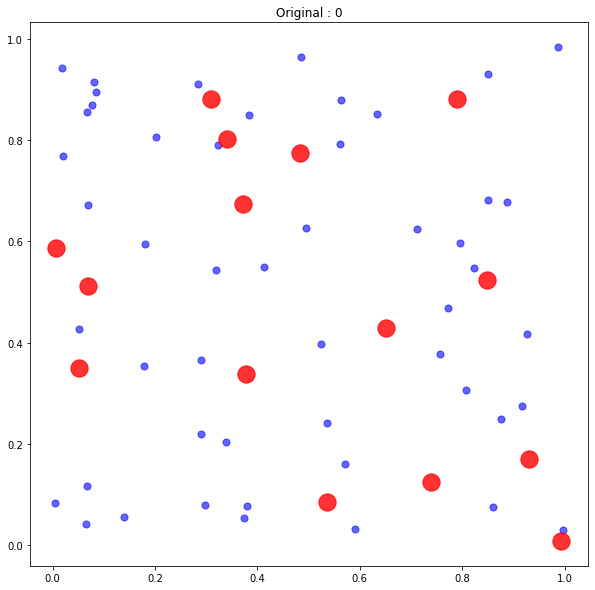

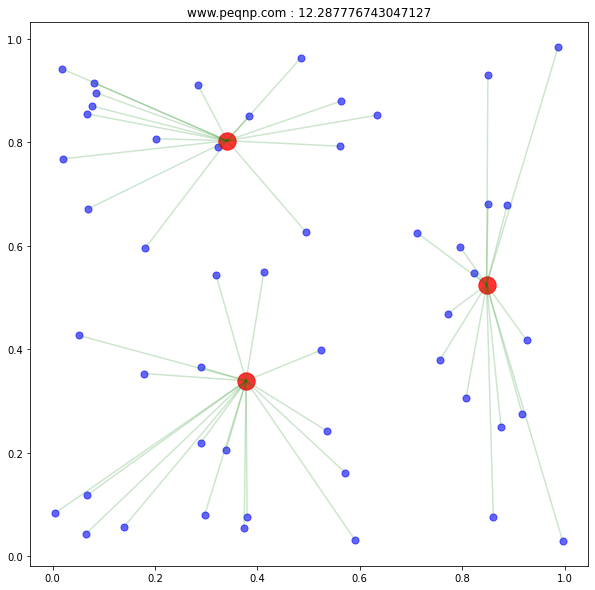

In [21]:
import numpy as np
import peqnp as pn
import matplotlib.pyplot as plt


def plot(I, J=None, X=None, title='Original', obj=0):
    plt.figure(figsize=(10, 10))
    plt.title('{} : {}'.format(title, obj))
    a, b = zip(*I)
    plt.scatter(a, b, c='blue', s=50, alpha=0.6)
    if J is not None:
        if X is not None:
            for i in range(m):
                for j in range(n):
                    if X[i][j]:
                        plt.plot([I[i][0], J[j][0]], [I[i][1], J[j][1]], 'g-',alpha=0.2)
        a, b = zip(*J)
        plt.scatter(a, b, c='red', s=300, alpha=0.8)
    else:
        a, b = zip(*J)
        plt.scatter(a, b, c='red', s=300, alpha=0.8)
    plt.show()
    plt.close()


def oracle(seq):
    global O, glb, n
    M = np.zeros(shape=(m, n))
    for i in range(m):
        for j in range(n):
            M[i][j] = np.linalg.norm(I[i] - J[seq[j]])
    pn.engine()
    X = np.asarray(pn.matrix(dimensions=(m, n), is_mip=True))
    pn.all_binaries(X.flatten())
    assert sum(X.flatten()) == m
    assert (X.sum(axis=1) == 1).all()
    obj = pn.minimize(sum(X[i][j] * M[i][j] for i in range(m) for j in range(n)))
    O = np.vectorize(int)(X)
    return obj

m = 50
k = 15
n = 3
I = np.random.sample(size=(m, 2))    
J = np.random.sample(size=(k, 2))
plot(I, J)
seq = pn.hess_sequence(k, oracle=oracle, fast=False)
plot(I, J[seq][:n], O, 'www.peqnp.com', oracle(seq))

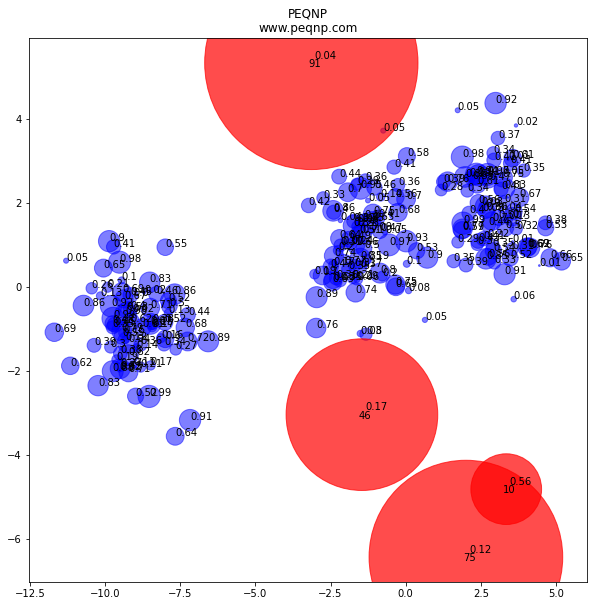

462.7274419607391


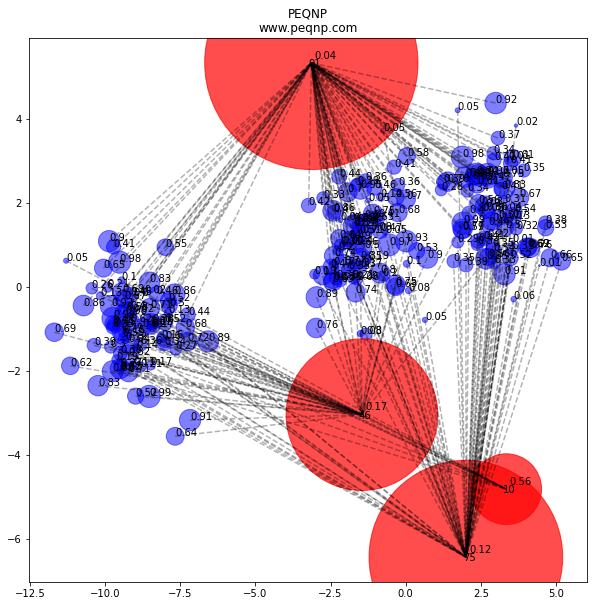

In [22]:
import numpy as np
import peqnp as pn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


def plot(X=None):
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.title('PEQNP\nwww.peqnp.com')
    plt.scatter(N[:, 0], N[:, 1], c='b', s=P * 500, alpha=0.5)
    for i in range(m):
        ax.annotate(str(round(P[i], 2)), (N[:, 0][i], N[:, 1][i]), size=10)
    plt.scatter(M[:, 0], M[:, 1], c='r', s=L * 500, alpha=0.7)
    for i in range(n):
        ax.annotate(str(round(T[i], 2)), (M[:, 0][i] + 0.1, M[:, 1][i] + 0.1))
        ax.annotate(str(L[i]), (M[:, 0][i] - 0.1, M[:, 1][i] - 0.1))
    if X is not None:
        for i in range(m):
            for j in range(n):
                if X[i][j]:
                    plt.plot([N[i][0], M[j][0]], [N[i][1], M[j][1]], 'k--', alpha=0.3)
    plt.show()


n = 4

L = np.random.randint(1, 100, size=n)  # capacity x facilities

m = sum(L)

N, _ = make_blobs(n_samples=m)  # customers
P = np.random.sample(size=m)  # priorities x customers
M = np.random.normal(size=(n, 2)) * n  # facilities
T = np.random.sample(size=n)  # priorities x facility
C = np.zeros(shape=(m, n))
for i in range(m):
    for j in range(n):
        C[i][j] = np.linalg.norm(N[i] - M[j])

D = np.zeros(shape=(m, n))
for i in range(m):
    for j in range(n):
        D[i][j] = P[i] - T[j]

plot()

pn.engine()
X = np.asarray(pn.matrix(dimensions=(m, n), is_mip=True))
pn.all_binaries(X.flatten())
assert (X.sum(axis=0) <= L).all()
assert (X.sum(axis=1) == 1).all()
print(pn.minimize((X * C * D).sum()))
plot(np.vectorize(int)(X))

# Sudoku 

is a logic-based, combinatorial number-placement puzzle. The objective is to fill a 9×9 grid with digits so that each column, each row, and each of the nine 3×3 subgrids that compose the grid (also called "boxes", "blocks", or "regions") contain all of the digits from 1 to 9. The puzzle setter provides a partially completed grid, which for a well-posed puzzle has a single solution.

Completed games are always an example of a Latin square which include an additional constraint on the contents of individual regions. For example, the same single integer may not appear twice in the same row, column, or any of the nine 3×3 subregions of the 9×9 playing board.

https://en.wikipedia.org/wiki/Sudoku

In [23]:
import numpy as np
import peqnp as pn


def expand_line(line):
    return line[0] + line[5:9].join([line[1:5] * (base - 1)] * base) + line[9:13]


def show(board):
    import string
    line0 = expand_line('╔═══╤═══╦═══╗')
    line1 = expand_line('║ . │ . ║ . ║')
    line2 = expand_line('╟───┼───╫───╢')
    line3 = expand_line('╠═══╪═══╬═══╣')
    line4 = expand_line('╚═══╧═══╩═══╝')

    symbol = ' ' + string.printable.replace(' ', '')
    nums = [[''] + [symbol[n] for n in row] for row in board]
    print(line0)
    for r in range(1, side + 1):
        print("".join(n + s for n, s in zip(nums[r - 1], line1.split('.'))))
        print([line2, line3, line4][(r % side == 0) + (r % base == 0)])


def generate(base):
    # pattern for a baseline valid solution
    def pattern(r, c):
        return (base * (r % base) + r // base + c) % side

    # randomize rows, columns and numbers (of valid base pattern)
    from random import sample

    def shuffle(s):
        return sample(s, len(s))

    rBase = range(base)
    rows = [g * base + r for g in shuffle(rBase) for r in shuffle(rBase)]
    cols = [g * base + c for g in shuffle(rBase) for c in shuffle(rBase)]
    nums = shuffle(range(1, base * base + 1))

    # produce board using randomized baseline pattern
    board = [[nums[pattern(r, c)] for c in cols] for r in rows]

    squares = side * side
    empties = (squares * 3) // 4
    for p in map(int, sample(range(squares), empties)):
        board[p // side][p % side] = 0

    show(board)
    return board


base = 4
side = base * base

puzzle = np.asarray(generate(base))

pn.engine(side.bit_length())

board = np.asarray(pn.matrix(dimensions=(side, side)))
pn.apply_single(board.flatten(), lambda x: 1 <= x <= side)

for i in range(side):
    for j in range(side):
        if puzzle[i][j]:
            assert board[i][j] == puzzle[i][j]

for c, r in zip(board, board.T):
    pn.all_different(c)
    pn.all_different(r)

for i in range(base):
    for j in range(base):
        pn.all_different(board[i * base:(i + 1) * base, j * base:(j + 1) * base].flatten())

if pn.satisfy(turbo=True):
    show(np.vectorize(int)(board))


╔═══╤═══╤═══╤═══╦═══╤═══╤═══╤═══╦═══╤═══╤═══╤═══╦═══╤═══╤═══╤═══╗
║   │ 1 │ 4 │   ║   │   │   │ 2 ║   │   │   │   ║ 5 │ 9 │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║   │   │   │ b ║   │   │ a │   ║   │   │ 2 │ 8 ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║ 8 │   │   │ d ║   │   │ f │   ║   │   │   │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║   │   │ 3 │   ║   │   │ b │ 5 ║   │   │ 4 │   ║ 2 │   │   │   ║
╠═══╪═══╪═══╪═══╬═══╪═══╪═══╪═══╬═══╪═══╪═══╪═══╬═══╪═══╪═══╪═══╣
║   │ 0 │   │   ║ 4 │   │   │   ║   │ 1 │ d │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║ 2 │   │   │   ║   │   │   │   ║ 0 │   │   │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║ 4 │   │ a │   ║   │   │   │ d ║   │   │   │   ║   │   │   │   ║
╟───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╫───┼───┼───┼───╢
║   │   │ 

# The PEQNP Standard Library

```python
def version():
    """
    Print the current version of the system.
    :return:
    """


def engine(bits=None, sat_solver_path=None, mip_solver_path=None, info=False):
    """
    Initialize and reset the internal state of solver engine.
    :param bits: The bits 2 ** bits - 1 of solving space.
    :param sat_solver_path: Path of the PEQNP compatible SAT Solver to use.
    :param mip_solver_path: Path of the PEQNP compatible MIP Solver to use.
    :param info: Return the info of the current system.
    :return:
    """


def integer(bits=None):
    """
    Correspond to an integer.
    :param bits: The bits of the integer.
    :return: An instance of Integer.
    """


def constant(value, bits=None):
    """
    Correspond to an constant of value with bits bits.
    :param bits: The bits bits of the constant.
    :param value: The value that represent the constant.
    :return: An instance of Constant.
    """


def satisfy():
    """
    Find a model for the current problem.
    :return: True if SATISFIABLE else False
    """


def subsets(lst, k=None, complement=False):
    """
    Generate all subsets for an specific universe of data.
    :param lst: The universe of data.
    :param k: The cardinality of the subsets.
    :param complement: True if include in return the complement.
    :return: (binary representation of subsets, the generic subset representation, the complement of subset if complement=True)
    """


def subset(data, k, empty=None, complement=False):
    """
    An operative structure (like integer ot constant) that represent a subset of at most k elements.
    :param data: The data for the subsets.
    :param k: The maximal bits for subsets.
    :param empty: The empty element, 0, by default.
    :param complement: True if include in return the complement.
    :return: An instance of subset or (subset, complement) if complement=True.
    """


def vector(bits=None, size=None, is_rational=False, is_gaussian=False, is_mip=False, is_real=False):
    """
    A vector of integers.
    :param bits: The bit bits for each integer.
    :param size: The bits of the vector.
    :param is_rational: Indicate of is a Rational vector.
    :param is_gaussian: Indicate of is a Gaussian Integers vector.
    :param is_mip: Indicate of is a MIP vector.
    :param is_real: Indicate of is a MIP vector and is real or int.
    :return: An instance of vector.
    """


def matrix(bits=None, dimensions=None, is_mip=False, is_real=False):
    """
    A matrix of integers.
    :param bits: The bit bits for each integer.
    :param dimensions: An tuple with the dimensions for the array (n, m).
    :param is_mip: Indicate of is a MIP vector.
    :param is_real: Indicate of is a MIP vector and is real or int.
    :return: An instance of Matrix.
    """


def matrix_permutation(lst, n):
    """
    This generate the permutations for an square matrix.
    :param lst: The flattened matrix of data, i.e. a vector.
    :param n: The dimension for the square nxn-matrix.
    :return: An tuple with (index for the elements, the elements that represent the indexes)
    """


def permutations(lst, n):
    """
    Entangle all permutations of bits n for the vector lst.
    :param lst: The list to entangle.
    :param n: The bits of entanglement.
    :return: (indexes, values)
    """


def combinations(lst, n):
    """
    Entangle all combinations of bits n for the vector lst.
    :param lst: The list to entangle.
    :param n: The bits of entanglement.
    :return: (indexes, values)
    """


def all_binaries(lst):
    """
    This say that, the vector of integer are all binaries.
    :param lst: The vector of integers.
    :return:
    """


def switch(x, ith, neg=False):
    """
    This conditionally flip the internal bit for an integer.
    :param x: The integer.
    :param ith: Indicate the ith bit.
    :param neg: indicate if the condition is inverted.
    :return: 0 if the uth bit for the argument collapse to true else return 1, if neg is active exchange 1 by 0.
    """


def one_of(lst):
    """
    This indicate that at least one of the instruction on the array is active for the current problem.
    :param lst: A list of instructions.
    :return: The entangled structure.
    """


def factorial(x):
    """
    The factorial for the integer.
    :param x: The integer.
    :return: The factorial.
    """


def sigma(f, i, n):
    """
    The Sum for i to n, for the lambda f f,
    :param f: A lambda f with an standard int parameter.
    :param i: The start for the Sum, an standard int.
    :param n: The integer that represent the end of the Sum.
    :return: The entangled structure.
    """


def pi(f, i, n):
    """
    The Pi for i to n, for the lambda f f,
    :param f: A lambda f with an standard int parameter.
    :param i: The start for the Pi, an standard int.
    :param n: The integer that represent the end of the Pi.
    :return: The entangled structure.
    """


def dot(xs, ys):
    """
    The dot product of two compatible Vectors.
    :param xs: The fist vector.
    :param ys: The second vector.
    :return: The dot product.
    """


def mul(xs, ys):
    """
    The elementwise product of two Vectors.
    :param xs: The fist vector.
    :param ys: The second vector.
    :return: The product.
    """


def apply_single(lst, f):
    """
    A sequential operation over a vector.
    :param lst: The vector.
    :param f: The lambda f of one integer variable.
    :return: The entangled structure.
    """


def apply_dual(lst, f):
    """
    A cross operation over a vector on all pairs i, j such that i < j elements.
    :param lst: The vector.
    :param f: The lambda f of two integer variables.
    :return: The entangled structure.
    """


def apply_different(lst, f):
    """
    A cross operation over a vector on all pairs i, j such that i != j elements.
    :param lst: The vector.
    :param f: The lambda f of two integer variables.
    :return: The entangled structure.
    """


def all_different(args):
    """
    The all different global constraint.
    :param args: A vector of integers.
    :return:
    """


def all_out(args, values):
    """
    The all different to values global constraint.
    :param args: A vector of integers.
    :param values: The values excluded.
    :return:
    """


def all_in(args, values):
    """
    The all in values global constraint.
    :param args: A vector of integers.
    :param values: The values included.
    :return:
    """


def flatten(mtx):
    """
    Flatten a matrix into list.
    :param mtx: The matrix.
    :return: The entangled structure.
    """


def bits():
    """
    The current bits for the engine.
    :return: The bits
    """


def oo():
    """
    The infinite for rhe system, the maximal value for the current engine.
    :return: 2 ** bits - 1
    """


def element(item, data):
    """
    Ensure that the element i is on the data, on the position index.
    :param item: The element
    :param data: The data
    :return: The position of element
    """


def index(ith, data):
    """
    Ensure that the element i is on the data, on the position index.
    :param ith: The element
    :param data: The data
    :return: The position of element
    """


def gaussian(x=None, y=None):
    """
    Create a gaussian integer from (x+yj).
    :param x: real
    :param y: imaginary
    :return: (x+yj)
    """


def rational(x=None, y=None):
    """
    Create a rational x / y.
    :param x: numerator
    :param y: denominator
    :return: x / y
    """


def at_most_k(x, k):
    """
    At most k bits can be activated for this integer.
    :param x: An integer.
    :param k: k elements
    :return: The encoded variable
    """


def sqrt(x):
    """
    Define x as a perfect square.
    :param x: The integer
    :return: The square of this integer.
    """


def hess_sequence(n, oracle, fast=True, cycles=1):
    """
    HESS Algorithm is a Universal Black Box Optimizer (sequence version).
    :param n: The size of sequence.
    :param oracle: The oracle, this output a number and input a sequence.
    :param fast: More fast less accuracy.
    :param cycles: How many times the HESS algorithm is executed.
    :return optimized sequence.
    """


def hess_binary(n, oracle, fast=True, cycles=1):
    """
    HESS Algorithm is a Universal Black Box Optimizer (binary version).
    :param n: The size of bit vector.
    :param oracle: The oracle, this output a number and input a bit vector.
    :param fast: More fast some times less accuracy.
    :param cycles: How many times the HESS algorithm is executed.
    :return optimized sequence.
    """


def hyper_loop(n, m):
    """
    An nested for loop
    :param n: The size of the samples
    :param m: The numbers in the sample 0..m
    :return:
    """


def reshape(lst, dimensions):
    """
    Reshape a list
    :param lst: The coherent list to reshape
    :param dimensions:  The list of dimensions
    :return: The reshaped list
    """


def tensor(dimensions):
    """
    Create a tensor
    :param dimensions: The list of dimensions
    :return: A tensor
    """


def linear(is_real=False):
    """
    Create a linear variable.
    :param is_real: If true, the variable is a real number if not an integer.
    :return: The new variable.
    """


def maximize(objective):
    """
    Maximize the objective, according to the current linear constrains.
    :param objective: An standard linear expression.
    :return: the values of the model in order of variable creation.
    """


def minimize(objective):
    """
    Minimize the objective, according to the current linear constrains.
    :param objective: An standard linear expression.
    :return: the values of the model in order of variable creation.
    """
```